In [1]:
# Unsupervised Learning
# Given that the majority of available data is unlabeled (we have input features X but no labels y), unsupervised learning
# has huge potential in many application areas. For example anomaly detection, where labelling of data is long, costly,
# tedious, and normally only done on a small subset of the dataset - so supervised algorithms will have poor performance.
# Also, say in a production line, if the product is changed, the whole process will need to be restarted from scratch.

# Dimensionality reduction is the most common unsupervised task, but other common areas are:
# Clustering: group similar instances into clusters - useful for data analysis, recommender systems, search engines,
# image segmentation, semi-supervised learning, dimensionality reduction, etc.
# Anomaly detetion: objective is to learn what normal data looks like, then detect abnormal instances like defective
# items on a production line or a new trend in a time series
# Density estimation: estimating the probability density function (PDF) of the random process that generated the dataset
# - commonly used for anomaly detection as instnaes located in low-density regions are likely to be anomalies. Also used
# in data analysis and visualization

In [2]:
# Clustering is the task of identifying similar instances and assigning them to clusters (groups of similar instances).
# Like classification, each instance is assigned to a group, however clustering achieves this without the label
# (unsupervised). The main applications include:

# Customer segmentation: clustering based on purchases and activity on a website
# Data analysis: run clustering algorithm so you can analyse each cluster separately
# Dimensionality reduction: once a dataset is clustered, the affinity of each instance can be measured (a measure of how
# well an instance fits into a cluster). So each instance's feature vector x can be replaced by a k-dimensional affinity
# vector, for k clusters. Generally k < n and it can preserve enough information for further processing
# Anomaly detection: any instance with a low affinity to all clusters is likely an anomaly
# Semi-supervised learning: if you only have a few labels, perform clustering and assign labels to all the instances in
# the same cluster - greatly increases number of labels for subsequent supervised algorithm, improving performance
# Image segmentation: by clustering pixels according to color, then replacing each pixel's color with the mean color of the
# cluster, you reduce the number of different colors in the image - used in object detection as it is easier to detect the
# contours of each object

# There is no universal definition of what a cluster is: it really depends on the context, and different algorithms will
# capture different kinds of clusters. Some algorithms look for instances centered around a particular point, called a
# centroid. Others look for continuous regions of densely packed instances: these clusters can take on any shape. Some
# algorithms are hierarchical, looking for clusters of clusters. And the list goes on.

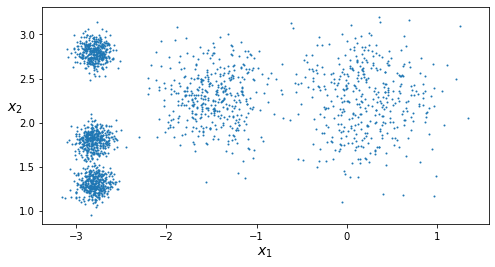

In [8]:
# Consider the unlabeled dataset shown below: you can clearly see five blobs of instances. The K-Means algorithm is a 
#simple algorithm capable of clustering this kind of dataset very quickly and efficiently, often in just a few iterations.

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [11]:
# Train a K-Means clusterer on this dataset - it tries to find each blob's center and assign each instance to the closest
# blob. Note that the number of clusters k must be specified - in general datasets this is not so obvious (see below)

from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [12]:
# Each instance was assigned to one of the five clusters. In the context of clustering, an instance's label is the index
# of the cluster it is assigned to (not to be confused with class labels, since it is unsupervised). The KMeans clusterer
# preserves a copy of the labels of the instances it was trained on, available in the labels_ attribute.
y_pred, y_pred is kmeans.labels_

(array([4, 0, 1, ..., 3, 1, 0], dtype=int32), True)

In [13]:
# We can also get the five centroids the algorithm found:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [14]:
# You can also assign new instnaces to the cluster whose centroid is closest
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, -2.5]])
kmeans.predict(X_new)

array([1, 1, 3, 4], dtype=int32)

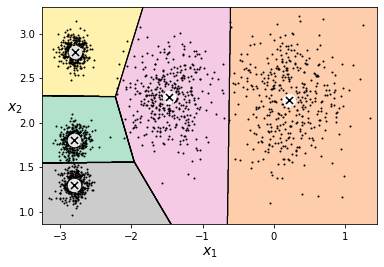

In [15]:
# Looking at the decision boundaries, the vast majority of the instances were clearly assigned to the appropriate cluster,
# but a few instances were probably mislabeled (especially near the boundary between the top-left cluster and the central 
# cluster). Indeed, the K-Means algorithm does not behave very well when the blobs have very different diameters because 
# all it cares about when assigning an instance to a cluster is the distance to the centroid.

import numpy as np

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        
plot_decision_boundaries(kmeans, X)

In [16]:
# Instead of assigining each instance to a single cluster (hard clustering), it can be useful to give each instance a score
# per cluster (soft clustering). The score can be the distance between the instance and the centroid, or it can be a 
# similarity score (affinity), such as the Gaussian RBF. In the KMeans class, the transform() method measures the distance
# from each instance to every centroid:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 1.49439034, 2.9042344 , 2.88633901],
       [5.80730058, 2.80290755, 4.4759332 , 5.84739223, 5.84236351],
       [1.21475352, 3.29399768, 1.69136631, 0.29040966, 1.71086031],
       [4.30564816, 5.73681686, 5.02544607, 5.30045797, 3.80606428]])

In [17]:
# Now each instance has k-scores representing the distance to each centroid. If you have a high-dimensional dataset, 
# transforming it in this way gives you a k-dimensional dataset - very efficient non-linear dimensionality reduction.

In [18]:
# So, how does the algorithm work? Well, suppose you were given the centroids. You could easily label all the instances in
# the dataset by assigning each of them to the cluster whose centroid is closest. Conversely, if you were given all the
# instance labels, you could easily locate all the centroids by computing the mean of the instances for each cluster. But
# you are given neither the labels nor the centroids, so how can you proceed? Well, just start by placing the centroids
# randomly (e.g., by picking k instances at random and using their locations as centroids). Then label the instances,
# update the centroids, label the instances, update the centroids, and so on until the centroids stop moving. The
# algorithm is guaranteed to converge in a finite number of steps (usually quite small); it will not oscillate forever
# because the mean squared distance between the instances and their closest centroid can only go down at each step.

# The computational complexity is generally linear w.r.t. the number of instances m, number of clusters k, and the dataset
# dimensionality/number of features n. However, this is only true when the data has a clustering structure - if it does not
# then in the worst case the complexity can increase exponentially with m (exp(m)). In reality this rarely happens, and 
# K-Means is generally one of the fastest clustering algorithms.

In [26]:
# Centroid initialization methods:
# The random centroid initialization step can mean that, although K-Means converges, it converges to a local optimum. 
# To mitigate the risk of this, there are a few techniques:

# (1) If you know appoximately where the centroids should be, set the init hyperparameter to a np.array containing the list
# of centroids and set n_init to 1.
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)
kmeans.fit(X)

# (2) Another solution is to run the algorithm multiple times with different random initializations and keep the best 
# solution. The n_init hyperparameter controls the number of random initializations/runs of the algorithm; the default is
# set to 10, so the algorithm runs 10 times when fit() is called, and sklearn keeps the best solution. 
# It determines the best solution by using a performance metric - the model's inertia. The inertia is the mean squared
# distance between each instance and its closest centroid, so KMeans is run n_init times and the model with the lowest 
# inertia is provided as the best solution.  
# The score() method returns the negative intertia, because a predictors score() method always respects Scikit-Learn's
# 'greater is better' rule: if one predictor is better than another, its score() method should return a greater score. 
kmeans.inertia_, kmeans.score(X)

# K-Means++ is an improvement to the algorithm which introduces a smarter initialization step that tends to select 
# centroids that are distant from one another, making the algorithm much less likely to converge to a suboptimal solution.
# The additional computation for the initialization is worth it as it makes it possible to drastically reduce to number
# of times the algorithm needs to be run to find the optimal solution. The KMeans class uses this initialization method by 
# default.
# Step 1. Take one centroid c^(1), chosen uniformly at random from the dataset
# Step 2. Take a new centroid c^(i), choosing an instance x^(i) with probability D(x^(i))^2 / ΣD(x^(j))^2, summing from 
# j=1 to i, where D(x^(i)) is the distance between x^(i) and the closest centroid that was already chosen. This 
# probability distribution ensures that instances farther away from the already chosen centroids are much more likely to
# be selected as centroids.
# Step 3. Repeat step 2 until all k-centroids have been selected.

(211.62337889822362, -211.6233788982236)

In [28]:
# Accelerated K-Means accelerates the algorithm by avoiding many unecessary distance calculations, done by exploiting the
# triangle inequality (that a straight line is always the shortest distance between two points, AC <= AB + BC) and by
# keeping track of lower and upper bounds for distances between instances and centroids. Again, the KMeans class uses this 
# by default.

# Mini-batch K-Means is another important variant which, instead of using the full dataset at each iteration, is capable
# of using mini-batches, moving the centroids just slightly at each iteration. This speeds up the algorithm by around a 
# factor of 3 or 4 and makes it possible to cluster huge datasets that do not fit in memory. The difference in speeds
# of the two algorithms increases with k, but likewise the differnce in inertia, which is generally slightly worse for
# the mini-batch algorithm, increase with k. The sklearn MiniBatchKmeans class can be used just like KMeans:

from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

# If the dataset does not fit in memory, the simplest option is to use the memmap class, as we did for incremental PCA. 
# Alternatively, you can pass one mini-batch at a time to the partial_fit() method, but this will require much more work,
# as you will need to perform multiple initializations and select the best one yourself (see master notebook for example).

MiniBatchKMeans(n_clusters=5)

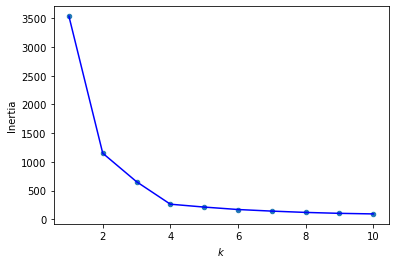

In [47]:
# In general, we will not know the correct number of clusters k, and the results can be quite bad if k is wrong.
# Unfortunately it is not as simple as picking the model with the lowest inertia, e.g. the inertia of a K-Means clustering
# on the above dataset with k = 8 is lower than with k = 5. Indeed as k increases, the inertia generally decreases as the
# closer each instance is to its closest centroid.

inertia = []
k_values = list(range(1, 11))
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, 'b-')
plt.scatter(k_values, inertia, s=20)
plt.xlabel(r'$k$')
plt.ylabel('Inertia')
plt.show()

# As you can see, the inertia drops very quickly as we increase k up to 4, but then it decreases much more slowly as we
# keep increasing k. This curve has roughly the shape of an arm, and there is an “elbow” at k = 4. So, if we did not know
# better, 4 would be a good choice: any lower value would be dramatic, while any higher value would not help much, and we
# might just be splitting perfectly good clusters in half for no good reason.

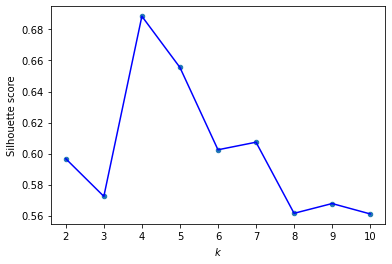

In [54]:
# This technique for choosing the best value for the number of clusters is rather coarse. A more precise approach (but
# also more computationally expensive) is to use the silhouette score, which is the mean silhouette coefficient over all
# the instances. An instance’s silhouette coefficient is equal to (b – a) / max(a, b), where a is the mean distance to the
# other instances in the same cluster (i.e., the mean intra-cluster distance) and b is the mean nearest-cluster distance
# (i.e., the mean distance to the instances of the next closest cluster, defined as the one that minimizes b, excluding the
# instance’s own cluster). The silhouette coefficient can vary between –1 and +1. A coefficient close to +1 means that the
# instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is
# close to a cluster boundary, and finally a coefficient close to –1 means that the instance may have been assigned to the
# wrong cluster.

from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = list(range(2, 11))
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.plot(k_values, silhouette_scores, 'b-')
plt.scatter(k_values, silhouette_scores, s=20)
plt.xlabel(r'$k$')
plt.ylabel('Silhouette score')
plt.show()

# As you can see, this visualization is much richer than the previous one: although it confirms that k = 4 is a very good
# choice, it also underlines the fact that k = 5 is quite good as well, and much better than k = 6 or 7. This was not 
# visible when comparing inertia values.

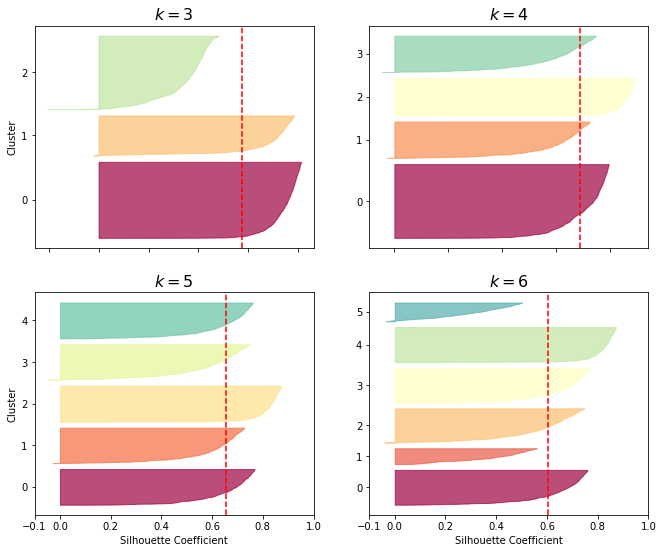

In [55]:
# An even more informative visualization is obtained when you plot every instance’s silhouette coefficient, sorted by the
# cluster they are assigned to and by the value of the coefficient. This is called a silhouette diagram.

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

# Each diagram contains one knife shape per cluster. The shape’s height indicates the number of instances the cluster
# contains, and its width represents the sorted silhouette coefficients of the instances in the cluster (wider is better).
# The dashed line indicates the mean silhouette coefficient.

In [56]:
# The vertical dashed lines represent the silhouette score for each number of clusters. When most of the instances in a
# cluster have a lower coefficient than this score (i.e., if many of the instances stop short of the dashed line, ending to
# the left of it), then the cluster is rather bad since this means its instances are much too close to other clusters. We
# can see that when k = 3 and when k = 6, we get bad clusters. But when k = 4 or k = 5, the clusters look pretty good:
# most instances extend beyond the dashed line, to the right and closer to 1.0. When k = 4, the cluster at index 1 (the
# third from the top) is rather big. When k = 5, all clusters have similar sizes. So, even though the overall silhouette
# score from k = 4 is slightly greater than for k = 5, it seems like a good idea to use k = 5 to get clusters of similar
# sizes.

In [57]:
# In summary, while K-Means clustering is fast and scalable, it has several drawbacks: (1) K-Means has to be run several
# times to avoid suboptimal solutions. (2) Need to specify the number of clusters. (3) K-Means does not behave well
# with clusters of varying sizes, different densities, or non-spherical shapes. For example, elliptical clusters are best
# treat with Gaussian mixture models. 

# In general, it is important to scale the input features before you run K-Means, or the clusters may be very stretched 
# and K-Means will perform poorly. Scaling the features does not guarantee that all the clusters will be nice and 
# spherical, but it generally improves things.

In [ ]:
# Applications of Clustering (can use K-Means or other clustering algorithms):
# Image Segmentation: the task of partitioning an image into multiple segments
# Semantic segmentation involves all the pixels part of the same object type getting assigned to the same segment.
# Instance segmentation involves all the pixels part of the same individual object getting assigned to the same segment.
# In self-driving vision, semantic involves all pixels that are part of a pedestrian's image being assigned to the
# pedestrian segment (i.e. one segment containing all pedestrians) while instance segmentation would have different
# segments for each pedestrian. The state of the art for these two segmentations are achieved by convolutional neural nets.

# Here, we will examine colour segmentation, where we assign pixels to the same segment if they have the same colour.
# This is useful in analuzing satellite images to measure how much total forest area there is in a region.

# Load image using Matplotlib's imread:
from matplotlib.image import imread   # or 'from imageio import imread'
image = imread(os.path.join('images','unsupervised_learning','ladybug.png'))
image.shape